In [1]:
import numpy  as np
import cv2
import os, os.path


image_set = []
data = "C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/images/images/"
data2= "C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized"


#Recorremos cada archivo y lo incluimos si cumple con la extension
valid_image_extensions = [".jpg", ".jpeg"]

file_list = os.listdir(data2)
for file in file_list:
  extension = os.path.splitext(file)[1]
  if extension.lower() not in valid_image_extensions:
    continue;
  image_set.append(os.path.join(data2, file))
  


In [2]:
print(len(image_set))
print(image_set[1])


8683
C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Albrecht_Du¦êrer_10.jpg


In [3]:
image_set_real=[]
i=0
for posiblenon in image_set:
    imgVal = cv2.imread(posiblenon)
    if not imgVal is None:
        image_set_real.append(posiblenon)
        print(i)
        i+=1
    


4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226


In [4]:
print(len(image_set_real))
imgVal= cv2.imread(image_set_real[8026])
print(imgVal)

8027
[[[153 116  96]
  [155 118  98]
  [157 118  96]
  ...
  [ 71 115 168]
  [ 71 117 171]
  [ 72 118 172]]

 [[150 113  93]
  [153 116  96]
  [155 115  96]
  ...
  [ 83 126 177]
  [ 81 125 178]
  [ 75 119 172]]

 [[148 110  92]
  [151 114  94]
  [154 114  95]
  ...
  [ 86 126 174]
  [ 85 126 175]
  [ 72 113 162]]

 ...

 [[ 43  93 121]
  [ 35  85 113]
  [ 44  96 126]
  ...
  [ 10  38  92]
  [  5  29  81]
  [  2  25  75]]

 [[ 46  96 124]
  [ 47  97 125]
  [ 57 109 139]
  ...
  [  6  32  86]
  [  2  24  76]
  [  3  24  75]]

 [[ 50 100 128]
  [ 56 106 134]
  [ 65 117 147]
  ...
  [  5  31  85]
  [  1  23  75]
  [  6  27  78]]]


In [6]:
from skimage.feature import hog
dict6 = {}
for im in image_set_real:
  image = cv2.imread(im,0)
  image44 = cv2.resize(image, (256,256))
  fd = hog(image44, orientations=8, pixels_per_cell=(8,8),cells_per_block=(1,1), visualize=False)
  dict6[im] = fd

In [7]:
#Probaremos resultados usando dos tipos de histogramas
#con la idea de determinar que tipo de histograma tendrá mejores resultados, cuando se trabaja con artes visuales
#La idea es ver que tan similares es una obra de un artista, a el resto de sus obras.
#Esto permitiria que en un futuro, podemos ingresar una imagen desde fuera de nuestro algoritmo y de esta forma,
#podriamos buscar a que artista pertenece la obra.

In [37]:
#Hacer busqueda de una imagen aleatoria
import random

#query = random.choice(file_list)
a = random.choice(image_set_real)
queryImage = cv2.imread(a)
histSize = 256
queryImageG = cv2.cvtColor(queryImage, cv2.COLOR_BGR2GRAY)
queryImageG=cv2.resize(queryImageG, (256,256))
#print(len(queryImage))
rows, cols =queryImageG.shape
queryHist = hog(queryImageG, orientations=8, pixels_per_cell=(8,8),cells_per_block=(1,1), visualize=False)

## 32 y 8

distances = []
print(len(queryHist))
#Busqueda
for im in image_set_real:
  dist = np.linalg.norm(queryHist - dict6[im])
  distances.append(dist)
  
index = np.argsort(distances)

8192


C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Claude_Monet_52.jpg


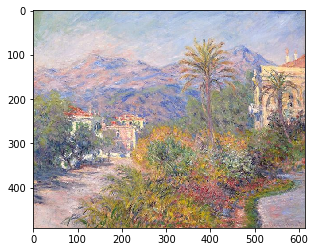

C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Gustav_Klimt_9.jpg
C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Leonardo_da_Vinci_76.jpg
C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Vincent_van_Gogh_650.jpg


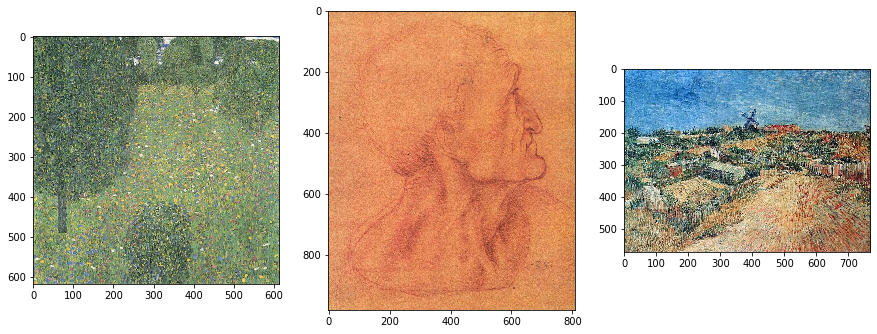

In [38]:
import matplotlib.pyplot as plt
#Mostrar resultados

fig1 = plt.imshow(queryImage[:,:,::-1])
print(a)
plt.show()
fig2 = plt.figure(figsize=(15,15))
for i in range(1, 4):
  fig2.add_subplot(1, 3, i)
  print(image_set_real[index[i]])
  imag = cv2.imread(image_set_real[index[i]])
  plt.imshow(imag[:,:,::-1])
  
plt.show()

In [21]:
dict = {}
for im in image_set_real:
  image = cv2.imread(im)
  hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
  desc = hist.flatten()
  desc = desc / (image.shape[0]*image.shape[1])
  dict[im] = desc


In [39]:
#Hacer busqueda de una imagen aleatoria
import random

#query = random.choice(file_list)
a2 = random.choice(image_set_real)
queryImage2 = cv2.imread(a2)
histSize = 256
queryImage2=cv2.resize(queryImage2, (256,256))
#print(len(queryImage))

query2 = cv2.calcHist(queryImage2, [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
query = query2.flatten()
query = query / (image.shape[0]*image.shape[1])

## 32 y 8

distances2 = []
#Busqueda
for im in image_set_real:
  dist = np.linalg.norm(query - dict[im])
  distances2.append(dist)
  
index2 = np.argsort(distances2)

C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Rene_Magritte_88.jpg


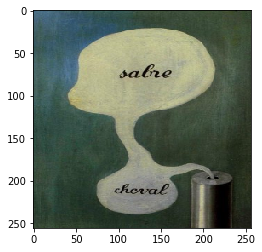

C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Henri_Matisse_184.jpg
C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Vasiliy_Kandinskiy_36.jpg
C:/Users/Meme/Desktop/U/8vo semestre/DB Multimedia/DATASi/resized/resized\Vincent_van_Gogh_227.jpg


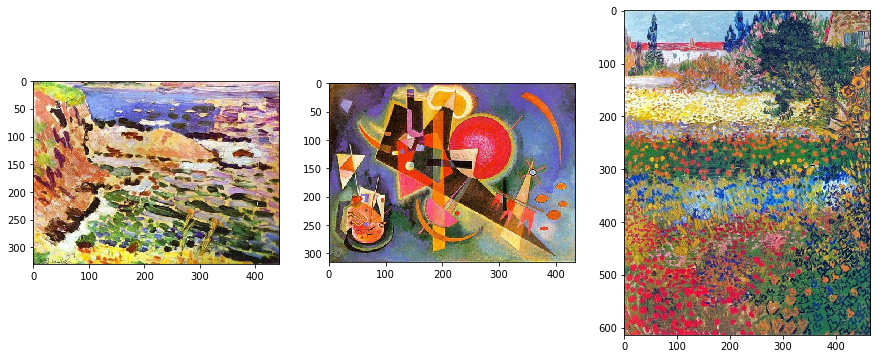

In [40]:
import matplotlib.pyplot as plt
#Mostrar resultados

fig1 = plt.imshow(queryImage2[:,:,::-1])
print(a2)
plt.show()
fig2 = plt.figure(figsize=(15,15))
for i in range(1, 4):
  fig2.add_subplot(1, 3, i)
  print(image_set_real[index2[i]])
  imag = cv2.imread(image_set_real[index2[i]])
  plt.imshow(imag[:,:,::-1])
  
plt.show()